#### Decision Tree 
- Decision tree is a tree based supervised machine learning algorithm which work somewhat similar to if-else ladder to predict and classify something.
- Decision Trees apply a sequence of decisions or rules that often depend on a single variable at a time.
- These trees partition our input in regions, refining the level of detail at each iteration/level until we reach the end of our tree, also called leaf node, which provides the final predicted label.

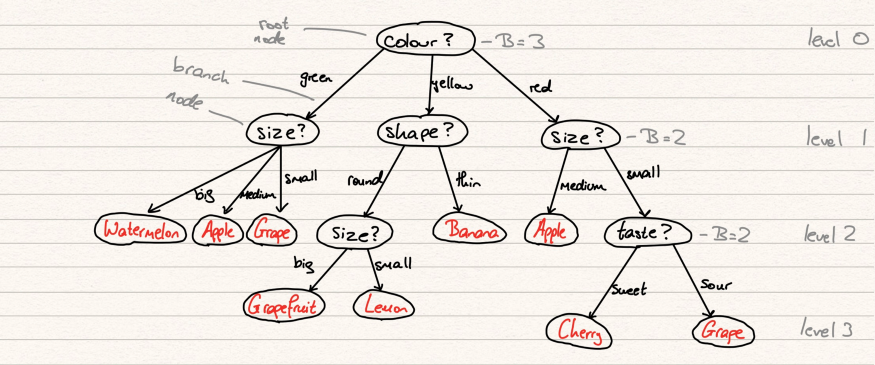

#### Top-Down and Greedy
- Now, the decision tree building process is a `top-down` approach. The top-down approach refers to the process of starting from the top with the whole data and gradually splitting the data into smaller subsets.  

- The reason we call the process `greedy` is because it does not take into account what will happen in the next two or three steps. <br>
The entire structure of the tree changes with small variations in the input data. This, in turn, changes the way you split and the final decisions altogether. This means that the process is not holistic in nature, as it only aims to gain an immediate result that is derived after splitting the data at a particular node based on a certain rule of the attribute.


#### Advantages of tree models

- Predictions made by a decision tree are easily `interpretable`.
- A decision tree is `versatile` in nature. It does not assume anything specific about the nature of the attributes in a data set. It can seamlessly handle all kinds of data such as numeric, categorical, strings, Boolean, etc.
- A decision tree is `scale-invariant`. It does not require normalisation, as it only has to compare the values within an attribute, and it handles multicollinearity better.
- Decision trees often give us an idea of the relative importance of the explanatory attributes that are used for prediction.
- They are highly `efficient` and `fast` algorithms.
- They can `identify complex relationships` and work well in certain cases where you cannot fit a single linear relationship between the target and feature variables. This is where regression with decision trees comes into the picture.


#### Impurity Measures
#### Entropy 
- one way to measure impurity degree is using entropy.
- example : Example: Given that Prob (Bus) = 0.4, Prob (Car) = 0.3 and Prob (Train) = 0.3, we can now compute entropy as.
- Entropy = - 0.4 log (0.4) ? 0.3 log (0.3) ? 0.3 log (0.3) = 1.571.

- `Note` : The logarithm is base 2.
- Entropy of a pure table (consist of single class) is zero because the probability is 1 and log (1) = 0. Entropy reaches maximum value when all classes in the table have equal probability. Figure below plots the values of maximum entropy for different number of classes n, where probability is equal to p=1/n. I this case, maximum entropy is equal to -n*p*log p. Notice that the value of entropy is larger than 1 if the number of classes is more than 2.

#### Gini Index 
- Another way to measure impurity degree is using Gini index.
- Example : Given that Prob (Bus) = 0.4, Prob (Car) = 0.3 and Prob (Train) = 0.3, we can now compute Gini index as
- Gini Index = 1 ? (0.4^2 + 0.3^2 + 0.3^2) = 0.660
- `Note` :  Gini index of a pure table (consist of single class) is zero because the probability is 1 and 1-(1)^2 = 0. Similar to Entropy, Gini index also reaches maximum value when all classes in the table have equal probability. Figure below plots the values of maximum gini index for different number of classes n, where probability is equal to p=1/n. Notice that the value of Gini index is always between 0 and 1 regardless the number of classes.    
  
  
### Classification error
-  it is a way to measure impurity degree using index of classification error
- example : Given that Prob (Bus) = 0.4, Prob (Car) = 0.3 and Prob (Train) = 0.3, index of classification error is given as.
- Classification Error Index = 1 ? Max{0.4, 0.3, 0.3} = 1 - 0.4 = 0.60
- `Note` :  Similar to Entropy and Gini Index, Classification error index of a pure table (consist of single class) is zero because the probability is 1 and 1-max(1) = 0. The value of classification error index is always between 0 and 1. In fact the maximum Gini index for a given number of classes is always equal to the maximum of classification error index because for a number of classes n, we set probability is equal to p=1/n and maximum Gini index happens at 1-n*(1/n)^2 = 1-1/n, while maximum classification error index also happens at 1-max{1/n} =1-1/n.
  
   
Decision trees help in quantifying the importance of each feature by calculating the reduction in the impurity for each feature at a node. `The feature that results in a significant reduction in the impurity is the important variable, and the one that results in less impurity reduction is the less important variable.`

#### Disadvantages 
- Overfitting of the Data
- Unstable
  
There are two ways to control overfitting in trees:

1. `Truncation` - Stop the tree while it is still growing so that it may not end up with leaves containing very few data points. Note that truncation is also known as pre-pruning.

2. `Pruning` - Let the tree grow to any complexity. Then, cut the branches of the tree in a bottom-up fashion, starting from the leaves. It is more common to use pruning strategies to avoid overfitting in practical implementations.


`Though there are various ways to truncate or prune trees, the DecisionTreeClassifier() function in sklearn provides the following hyperparameters which you can control:`

`criterion (Gini/IG or entropy)`: It defines the homogeneity metric to measure the quality of a split. Sklearn supports “Gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value of “Gini”.

`max_features`: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.

`max_depth`: The max_depth parameter denotes the maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves contain just one data point (leading to overfitting) or until all leaves contain less than "min_samples_split" samples. By default, it takes “None” value.

`min_samples_split`: This tells about the minimum no. of samples required to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split. By default, it takes the value "2".

`min_samples_leaf`: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows the percentage. By default, it takes the value "1".
 

#### Code

Dataset Information :

- Heart disease = 0 means that the person does not have heart disease.
- Heart disease = 1 means that the person has heart disease.

 

- sex = 0 means that the person is female.

- sex = 1 means that the person is male.

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('heart_v2.csv')

In [5]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [6]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [7]:
df.shape

(270, 5)

In [8]:
# Putting feature variable to X
X = df.drop('heart disease', axis=1)
# Putting response variable to y
y = df['heart disease']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [11]:
X_train.shape

(189, 4)

In [12]:
y_train.shape

(189,)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
# fit with train data

In [25]:
#!pip install six

In [26]:
#!pip install pydotplus

In [27]:
#!pip install graphviz

In [23]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

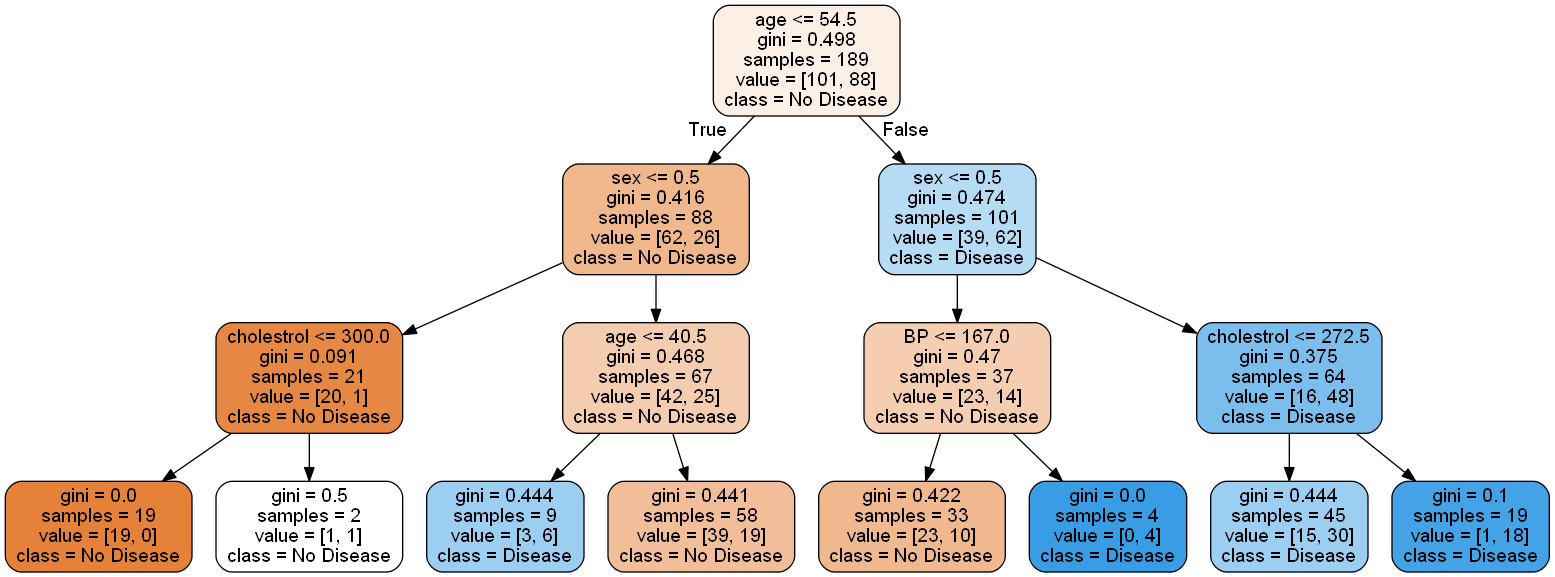

In [18]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               feature_names=X.columns,
               class_names=['No Disease', 'Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


#### Evaluating model performance

In [17]:
# predict on train and test
y_train_pre = dt.predict(X_train)
y_test_pre = dt.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
print(accuracy_score(y_train, y_train_pre))
print(confusion_matrix(y_train, y_train_pre))


0.7407407407407407
[[82 19]
 [30 58]]


In [20]:
print(accuracy_score(y_test, y_test_pre))
print(confusion_matrix(y_test, y_test_pre))


0.6049382716049383
[[35 14]
 [18 14]]


#### Create some helper function

In [21]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                   feature_names=X.columns,
                   class_names=['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    #Image(graph.create_png())
    

In [22]:
def evaluate_model(dt_classifier):
    y_train_predict = dt_classifier.predict(X_train)
    y_test_predict = dt_classifier.predict(X_test)
    print("Train Accuracy",accuracy_score(y_train, y_train_predict))
    print("Train Confusion Matrix")
    print(confusion_matrix(y_train, y_train_predict))
    print("-"*50)
    print("Test Accuracy",accuracy_score(y_test, y_test_predict))
    print("Test Confusion Matrix")
    print(confusion_matrix(y_test, y_test_predict))     
    

In [23]:
dt_default = DecisionTreeClassifier(random_state=42)


In [24]:
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
grp = get_dt_graph(dt_default)

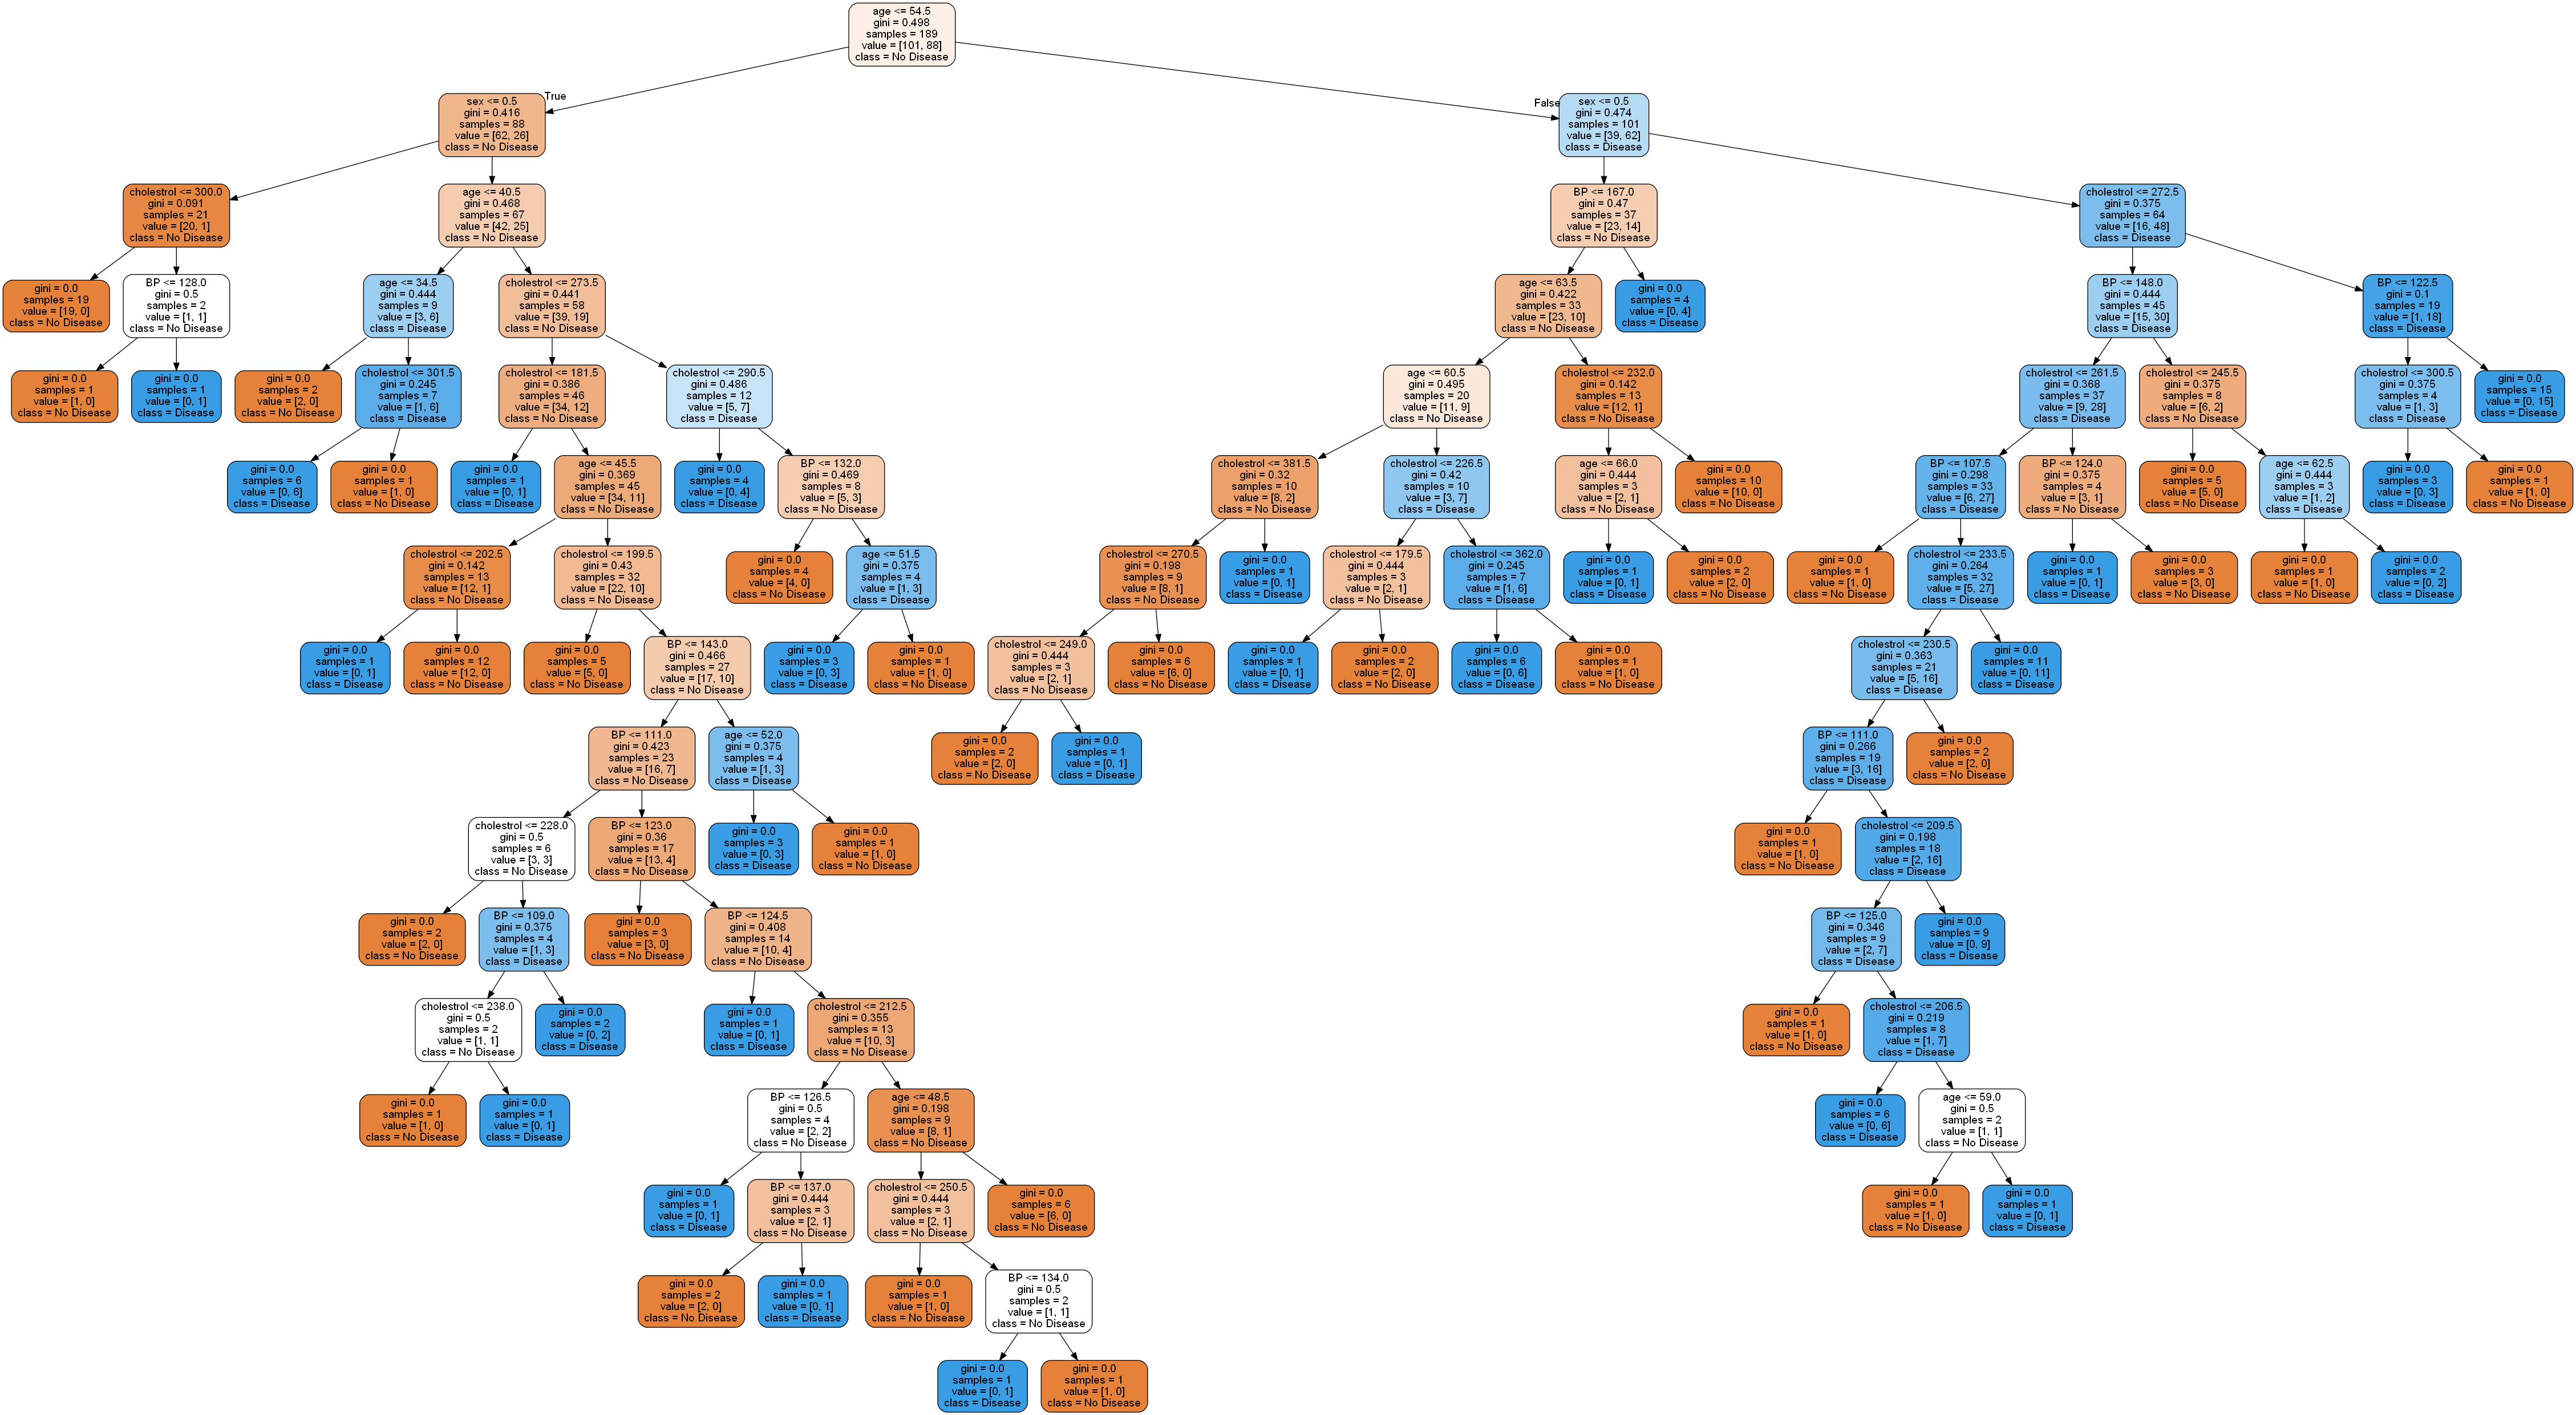

In [26]:
Image(grp.create_png())

In [27]:
evaluate_model(dt_default)

Train Accuracy 1.0
Train Confusion Matrix
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy 0.6296296296296297
Test Confusion Matrix
[[31 18]
 [12 20]]


In [28]:
dt_depth = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

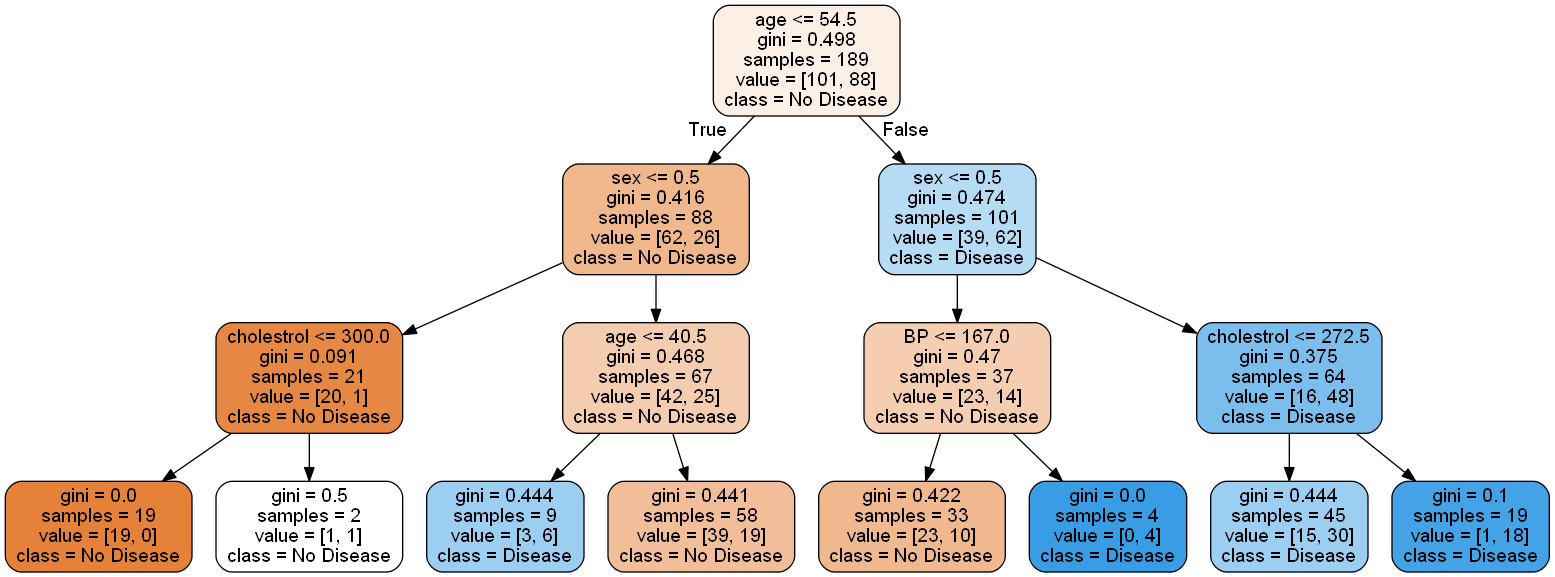

In [29]:
grp =  get_dt_graph(dt_depth)
Image(grp.create_png())

In [30]:
evaluate_model(dt_depth)

Train Accuracy 0.7407407407407407
Train Confusion Matrix
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy 0.6049382716049383
Test Confusion Matrix
[[35 14]
 [18 14]]


In [31]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

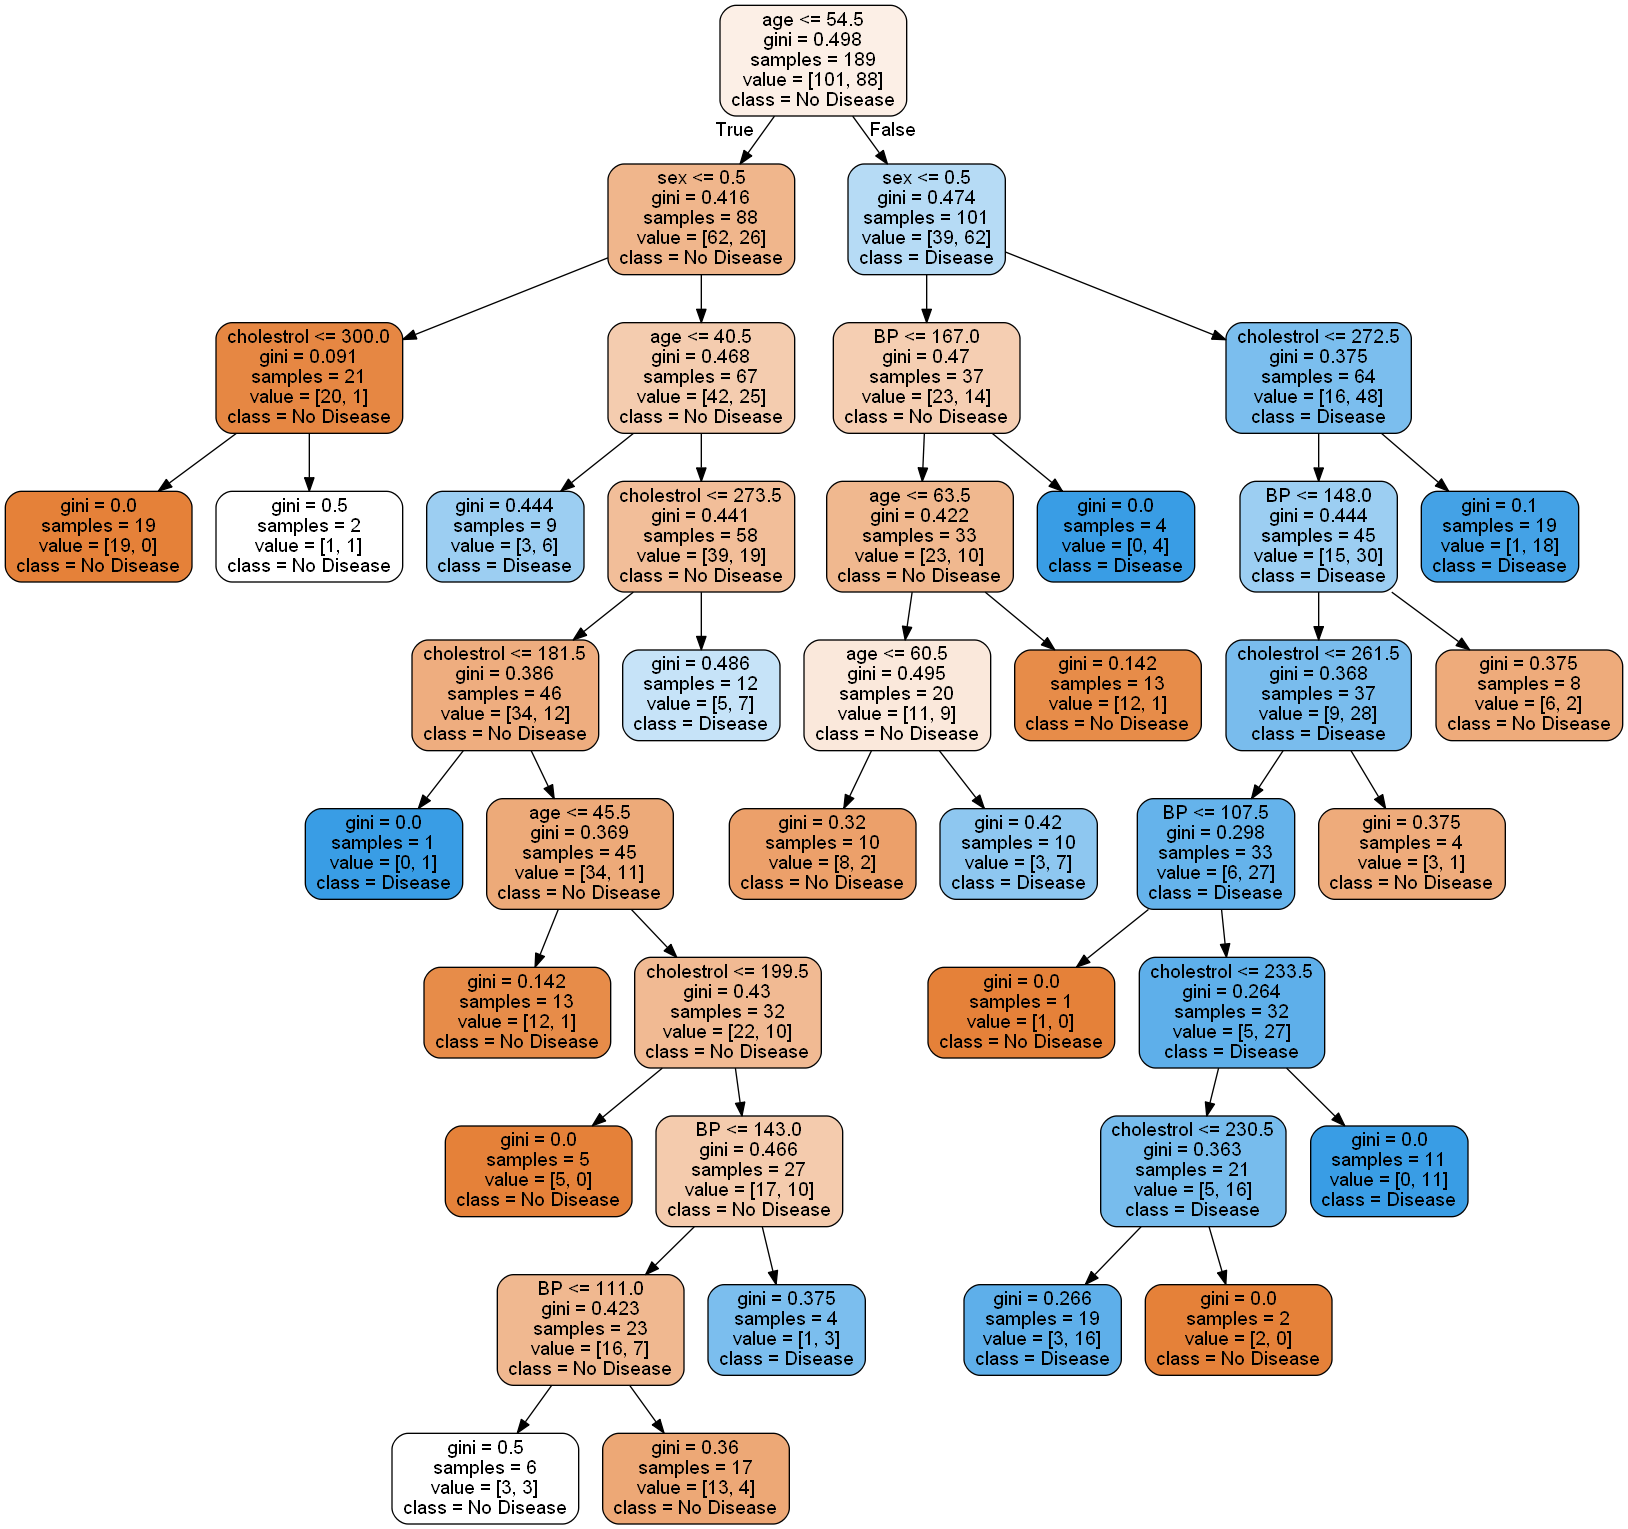

In [32]:
grp =  get_dt_graph(dt_min_split)
Image(grp.create_png())

In [33]:
evaluate_model(dt_min_split)

Train Accuracy 0.8359788359788359
Train Confusion Matrix
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy 0.6419753086419753
Test Confusion Matrix
[[32 17]
 [12 20]]


In [34]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

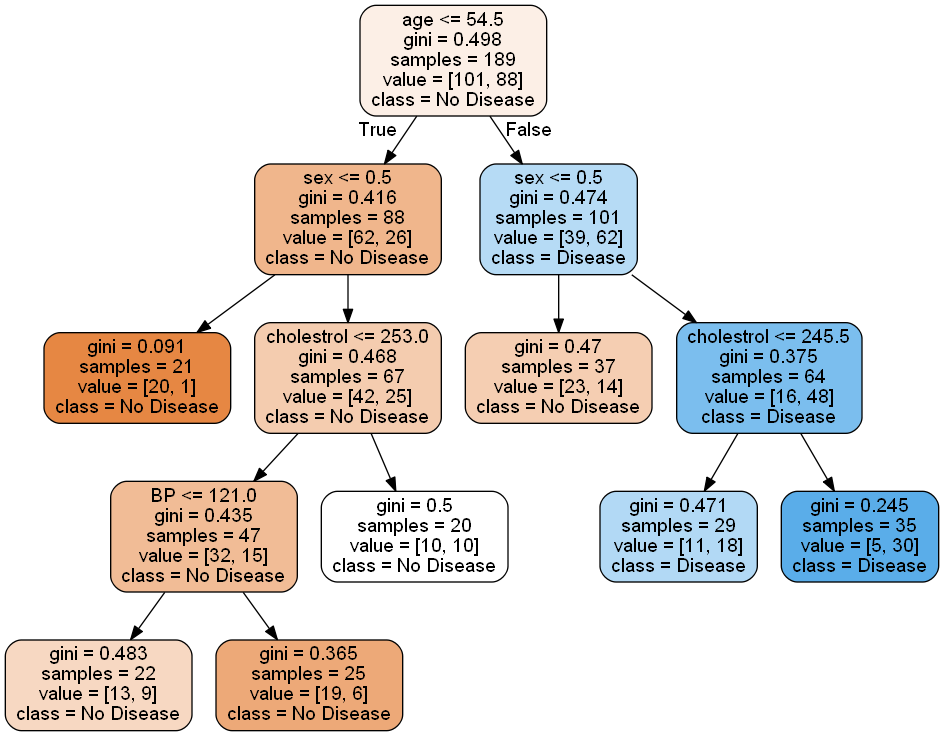

In [35]:
grp =  get_dt_graph(dt_min_leaf)
Image(grp.create_png())

In [36]:
evaluate_model(dt_min_leaf)

Train Accuracy 0.7037037037037037
Train Confusion Matrix
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy 0.6419753086419753
Test Confusion Matrix
[[38 11]
 [18 14]]


In [37]:
dt_min_leaf_ent = DecisionTreeClassifier(min_samples_leaf=20,random_state=42, criterion='entropy')
dt_min_leaf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

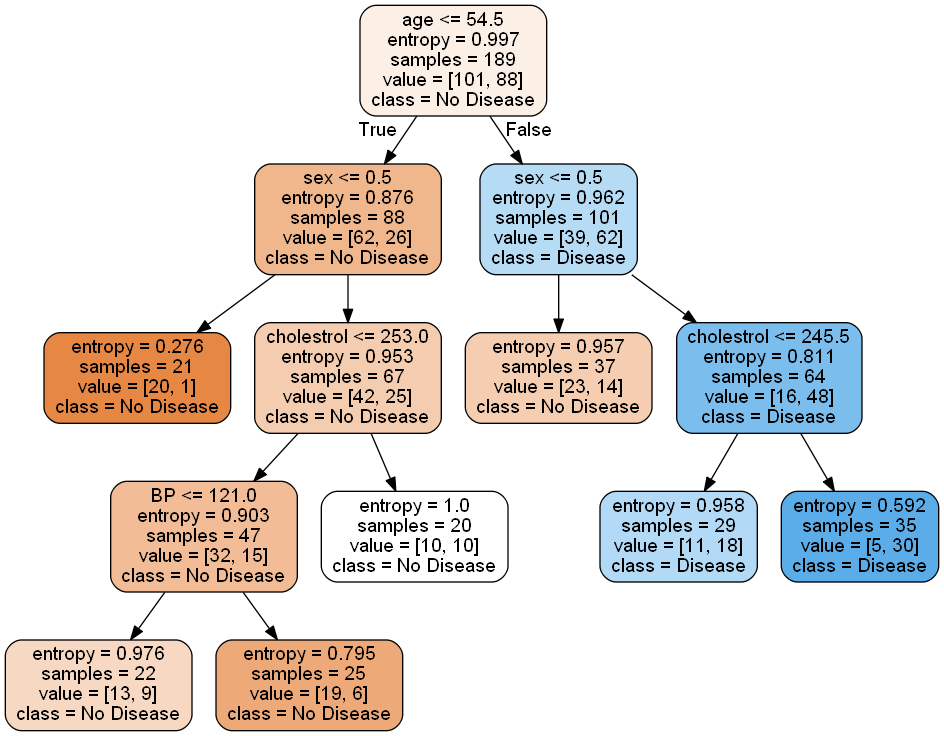

In [38]:
grp =  get_dt_graph(dt_min_leaf_ent)
Image(grp.create_png())

### Hyper Parameters

In [28]:
#!pip install --upgrade scikit-learn

In [11]:
dt = DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# create the parameter for grid
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion': ["gini", "entropy"]
    
    
}

In [14]:
%%time
grid_search = GridSearchCV(estimator=dt,
                         param_grid=params,
                         cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


Wall time: 0 ns


In [27]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [29]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [30]:
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010540,0.000908,0.005901,0.000310,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.010847,0.002529,0.006198,0.000505,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.009908,0.002454,0.007833,0.001514,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.008400,0.000643,0.005622,0.001073,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.008404,0.000649,0.005786,0.000800,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41
5,0.008065,0.000248,0.005296,0.000555,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
6,0.008187,0.000249,0.006266,0.000982,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.645833,0.680851,0.595745,0.680851,0.650820,0.034864,13
7,0.008312,0.000336,0.005853,0.000922,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
8,0.008503,0.001009,0.005178,0.000758,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
9,0.008354,0.000833,0.005651,0.000294,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [31]:
score_df.shape

(50, 15)

In [32]:
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010540,0.000908,0.005901,0.000310,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.010847,0.002529,0.006198,0.000505,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.009908,0.002454,0.007833,0.001514,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.008400,0.000643,0.005622,0.001073,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.008404,0.000649,0.005786,0.000800,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [33]:
score_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.008199,0.001205,0.005766,0.000544,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.008065,0.000248,0.005296,0.000555,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.008400,0.000643,0.005622,0.001073,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.008503,0.001009,0.005178,0.000758,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.010423,0.001236,0.005923,0.000713,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [34]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [35]:
evaluate_model(grid_search.best_estimator_)

Train Accuracy 0.7195767195767195
Train Confusion Matrix
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy 0.6172839506172839
Test Confusion Matrix
[[36 13]
 [18 14]]
